# Test PDPbox with multiclass classification problem
## Kaggle Otto Group with RandomForest
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from pdpbox import pdp, get_dataset, info_plots

# get dataset and model

In [2]:
test_otto = get_dataset.otto()
test_otto.keys()

['data', 'features', 'rf_model', 'target']

In [3]:
otto_data = test_otto['data']
otto_features = test_otto['features']
otto_model = test_otto['rf_model']
otto_target = test_otto['target']

# 1. single numeric feature: 'feat_67'

## 1.1 target distribution through feature 'feat_67'

In [4]:
otto_target

['target',
 'target_0',
 'target_1',
 'target_2',
 'target_3',
 'target_4',
 'target_5',
 'target_6',
 'target_7',
 'target_8']

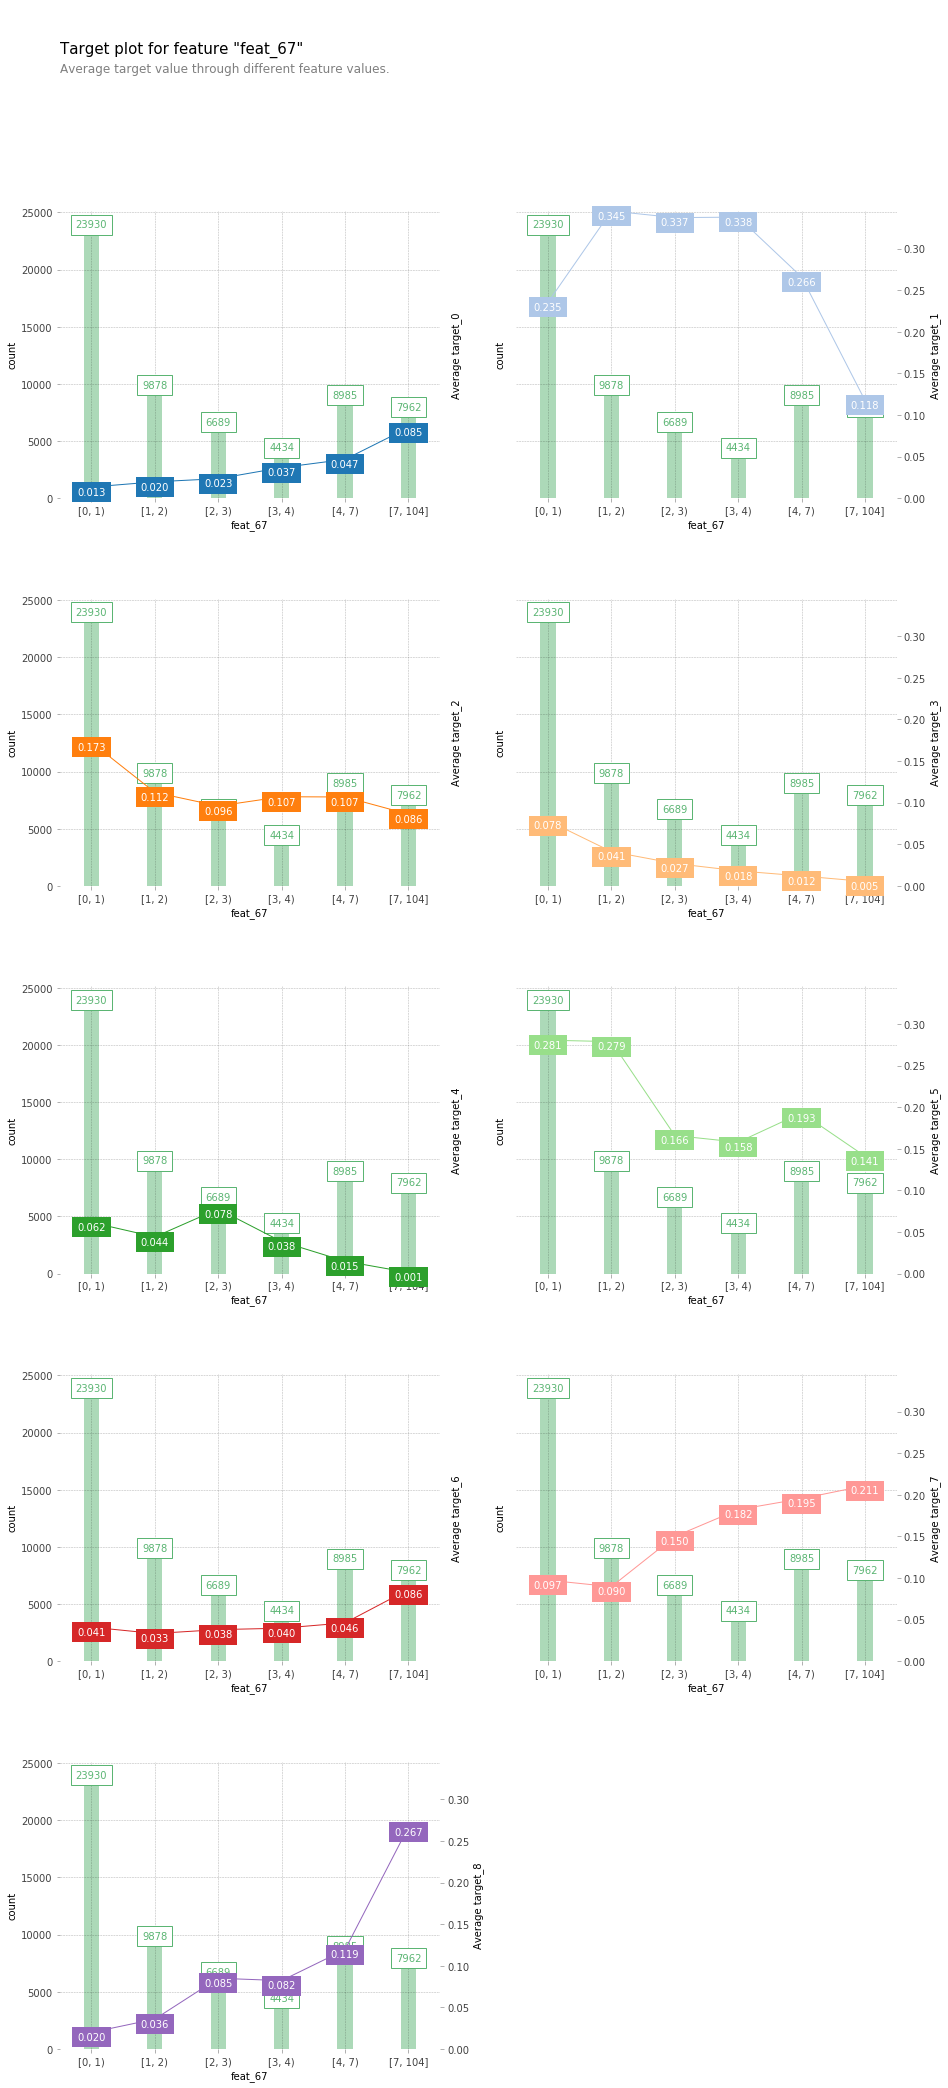

In [7]:
# default
fig, axes, summary_df = info_plots.target_plot(
    df=otto_data, feature='feat_67', feature_name='feat_67', target=otto_target[1:]
)

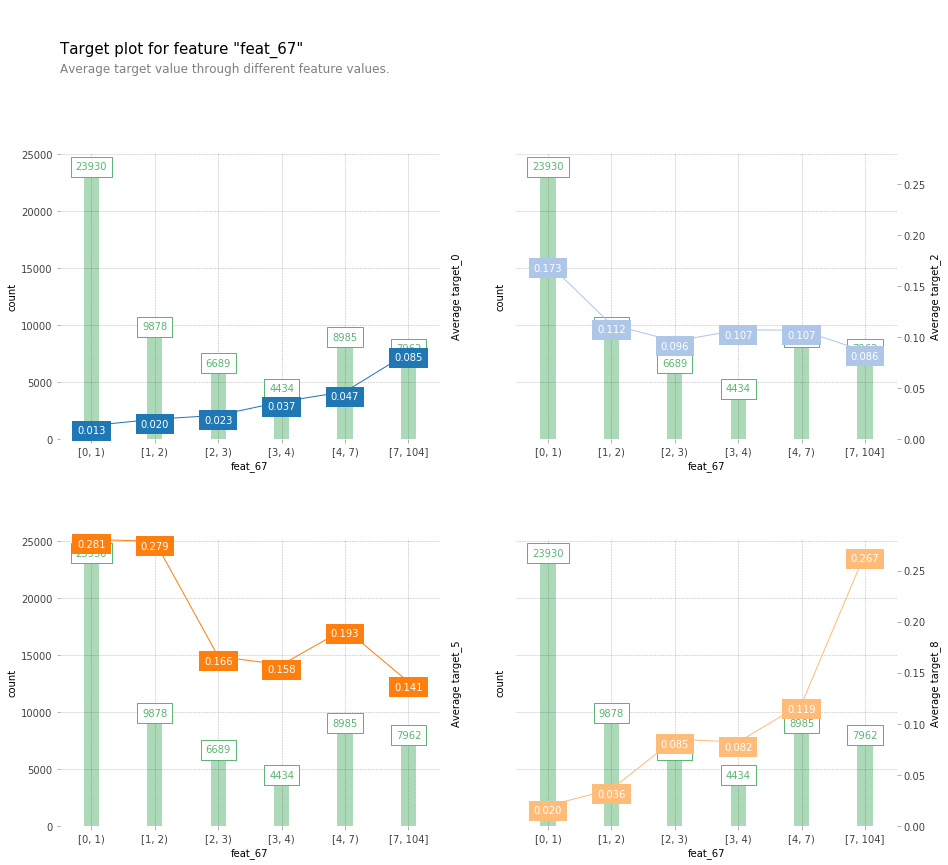

In [11]:
# select certain class
fig, axes, summary_df = info_plots.target_plot(
    df=otto_data, feature='feat_67', feature_name='feat_67', 
    target=['target_0', 'target_2', 'target_5', 'target_8']
)

In [12]:
summary_df

,x,display_column,value_lower,value_upper,count,target_0,target_2,target_5,target_8
0,0,"[0, 1)",0.0,1.0,23930,0.013414,0.172628,0.280527,0.019766
1,1,"[1, 2)",1.0,2.0,9878,0.019640,0.112371,0.278801,0.035837
2,2,"[2, 3)",2.0,3.0,6689,0.023471,0.095978,0.165944,0.084916
3,3,"[3, 4)",3.0,4.0,4434,0.036761,0.107127,0.157871,0.082093
4,4,"[4, 7)",4.0,7.0,8985,0.046633,0.106845,0.193100,0.119310
5,5,"[7, 104]",7.0,104.0,7962,0.084778,0.086159,0.141045,0.266767


## 1.2 check prediction distribution through feature 'feat_67'

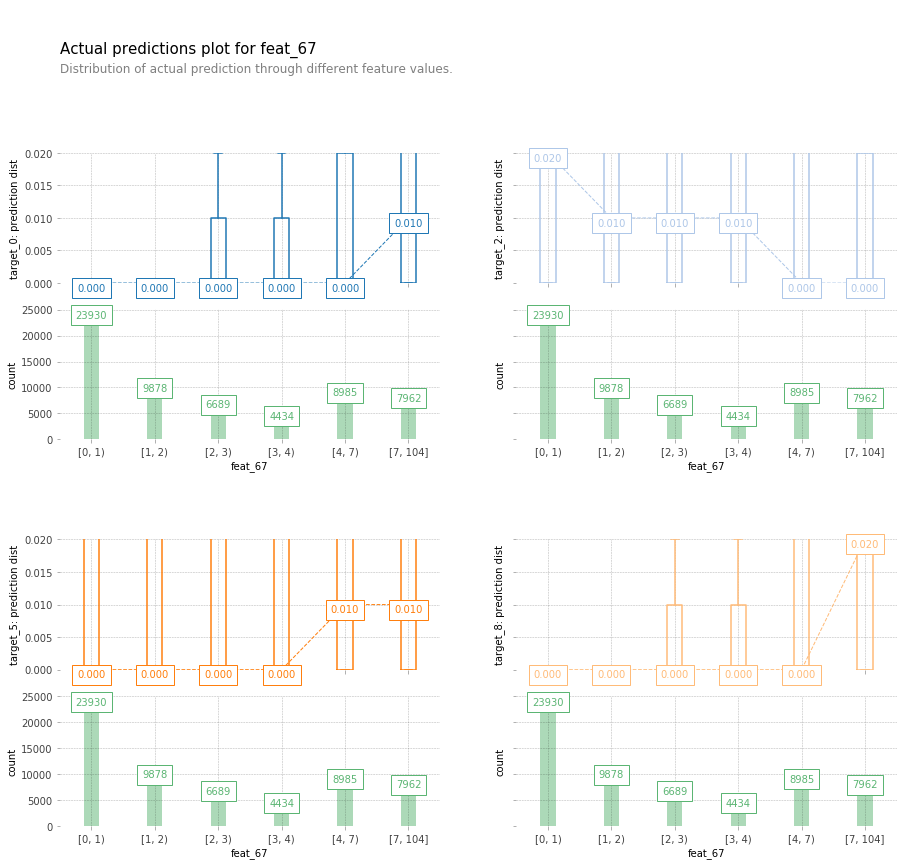

In [13]:
fig, axes, df = info_plots.actual_plot(
    model=otto_model, X=otto_data[otto_features], feature='feat_67', feature_name='feat_67', 
    which_classes=[0, 2, 5, 8]
)

In [14]:
summary_df

,x,display_column,value_lower,value_upper,count,target_0,target_2,target_5,target_8
0,0,"[0, 1)",0.0,1.0,23930,0.013414,0.172628,0.280527,0.019766
1,1,"[1, 2)",1.0,2.0,9878,0.019640,0.112371,0.278801,0.035837
2,2,"[2, 3)",2.0,3.0,6689,0.023471,0.095978,0.165944,0.084916
3,3,"[3, 4)",3.0,4.0,4434,0.036761,0.107127,0.157871,0.082093
4,4,"[4, 7)",4.0,7.0,8985,0.046633,0.106845,0.193100,0.119310
5,5,"[7, 104]",7.0,104.0,7962,0.084778,0.086159,0.141045,0.266767


## 1.3 pdp for feature 'feat_67'

In [15]:
%%time 
pdp_feat_67_rf = pdp.pdp_isolate(
    model=otto_model, dataset=otto_data, model_features=otto_features, feature='feat_67'
)

CPU times: user 11.4 s, sys: 553 ms, total: 12 s
Wall time: 4.27 s


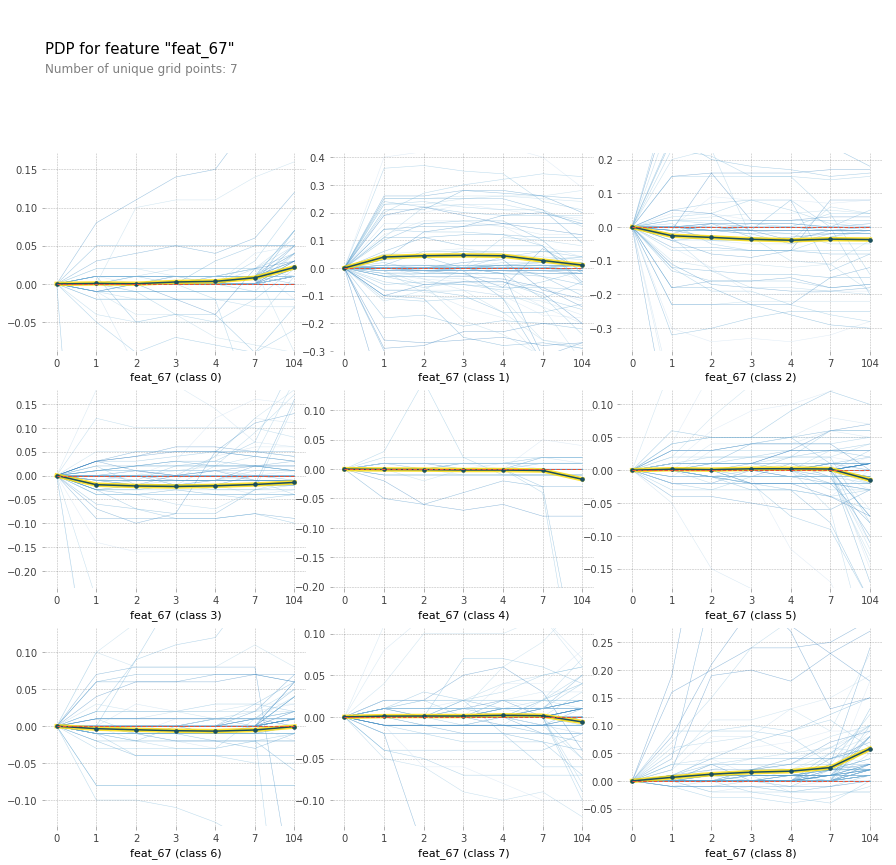

In [16]:
fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp_feat_67_rf, feature_name='feat_67', center=True, x_quantile=True, 
    ncols=3, plot_lines=True, frac_to_plot=100
)

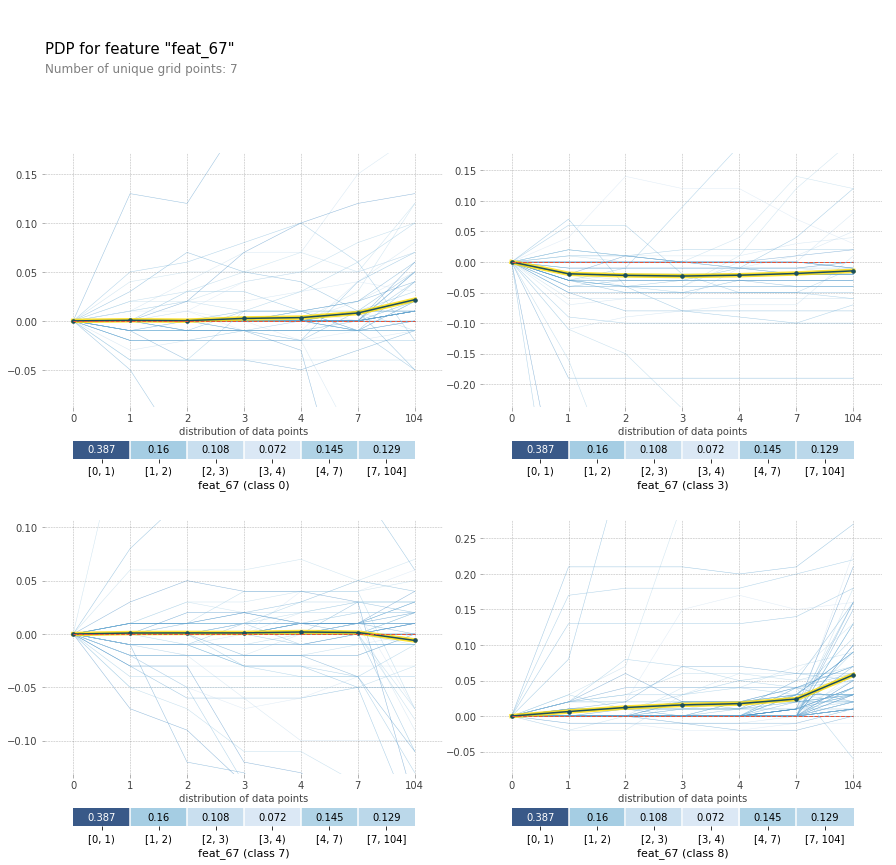

In [18]:
fig, axes = pdp.pdp_plot(
    pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=2, plot_lines=True, frac_to_plot=100,
    which_classes=[0, 3, 7, 8], plot_pts_dist=True
)

# 2. Interaction between two variables: feat_67 and feat_24

## 2.1 target distribution through feature combination of 'feat_67' and 'feat_24'

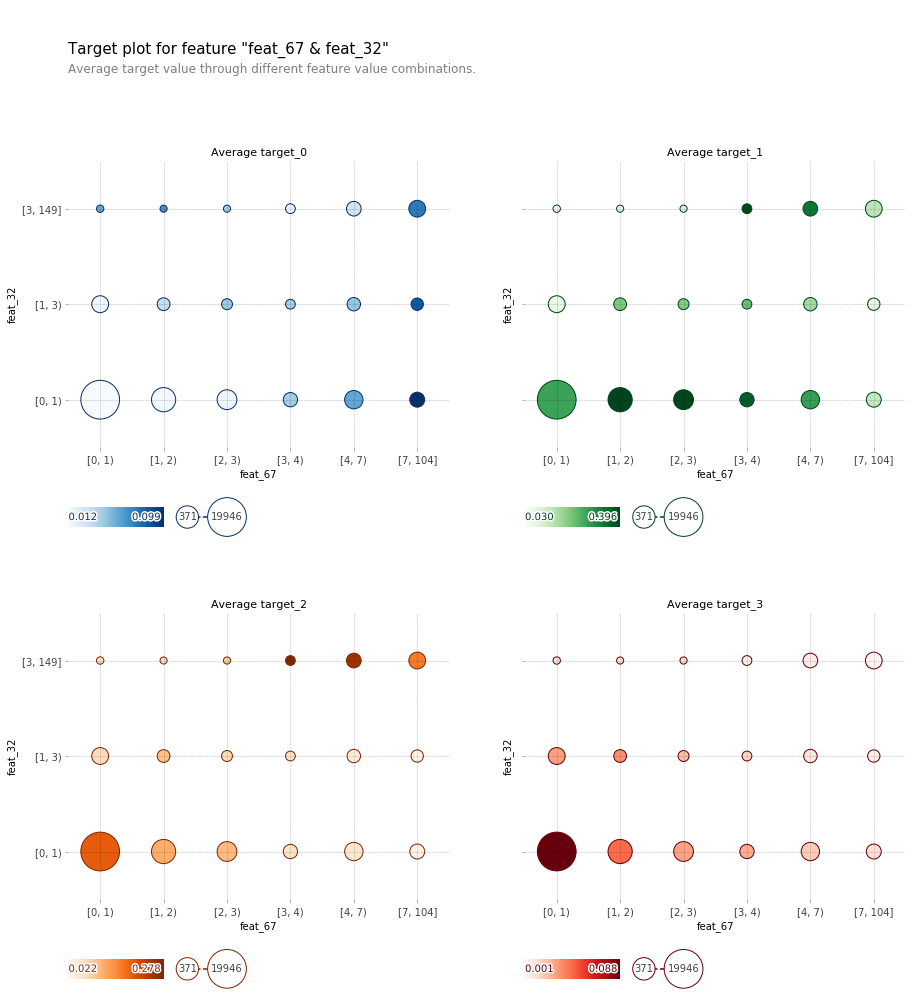

In [19]:
# default
fig, axes, summary_df = info_plots.target_plot_interact(
    df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
    target=['target_0', 'target_1', 'target_2', 'target_3']
)

In [20]:
summary_df.head()

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,value_lower_2,value_upper_2,count,target_0,target_1,target_2,target_3
0,0,0,"[0, 1)","[0, 1)",0.0,1.0,0.0,1.0,19946,0.012083,0.270029,0.193873,0.088439
1,0,1,"[0, 1)","[1, 3)",0.0,1.0,1.0,3.0,3555,0.015752,0.065823,0.067792,0.030098
2,0,2,"[0, 1)","[3, 149]",0.0,1.0,3.0,149.0,429,0.055944,0.030303,0.053613,0.009324
3,1,0,"[1, 2)","[0, 1)",1.0,2.0,0.0,1.0,7604,0.014203,0.396107,0.118096,0.044582
4,1,1,"[1, 2)","[1, 3)",1.0,2.0,1.0,3.0,1903,0.032580,0.200736,0.099842,0.034157


## 2.2 prediction distribution through feature combination of 'feat_67' and 'feat_24'

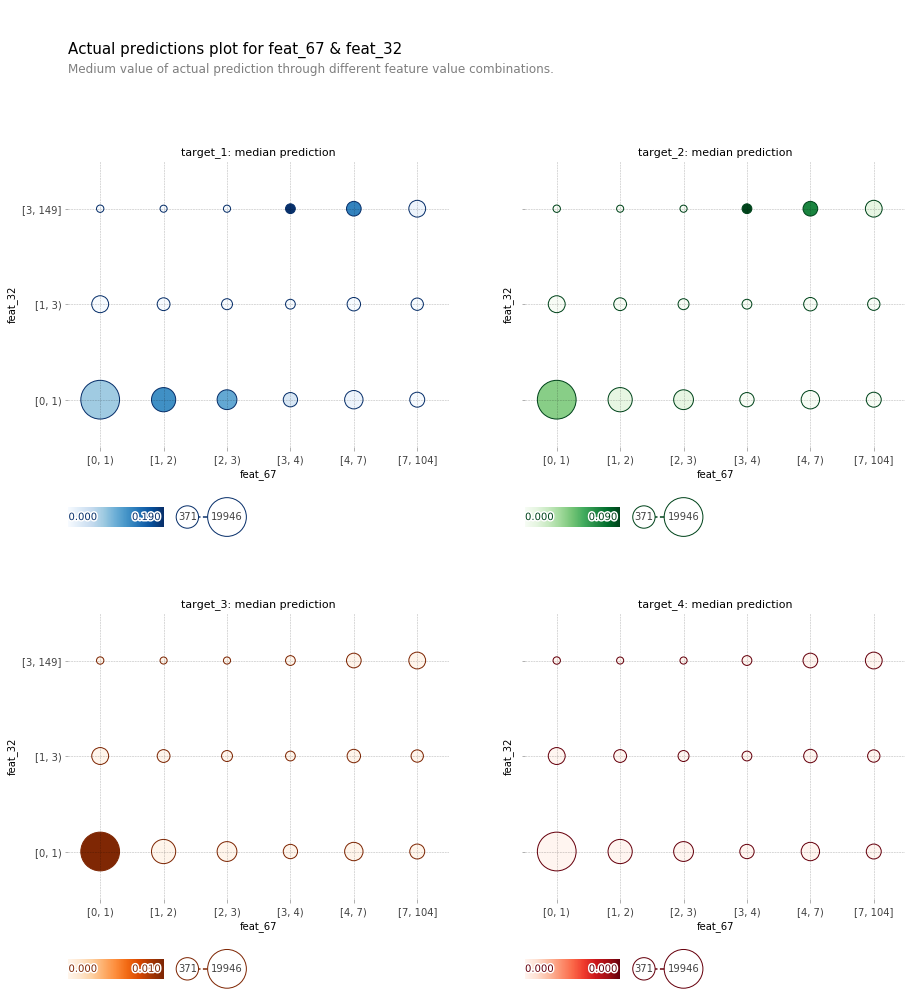

In [22]:
fig, axes, summary_df = info_plots.actual_plot_interact(
    model=otto_model, X=otto_data[otto_features], features=['feat_67', 'feat_32'], 
    feature_names=['feat_67', 'feat_32'], which_classes=[1, 2, 3, 4]
)

In [23]:
summary_df.head()

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,value_lower_2,value_upper_2,count,actual_prediction_1_q1,...,actual_prediction_1_q3,actual_prediction_2_q1,actual_prediction_2_q2,actual_prediction_2_q3,actual_prediction_3_q1,actual_prediction_3_q2,actual_prediction_3_q3,actual_prediction_4_q1,actual_prediction_4_q2,actual_prediction_4_q3
0,0,0,"[0, 1)","[0, 1)",0.0,1.0,0.0,1.0,19946,0.0,...,0.72,0.0,0.04,0.17,0.0,0.01,0.04,0.0,0.0,0.0
1,0,1,"[0, 1)","[1, 3)",0.0,1.0,1.0,3.0,3555,0.0,...,0.01,0.0,0.00,0.01,0.0,0.00,0.00,0.0,0.0,0.0
2,0,2,"[0, 1)","[3, 149]",0.0,1.0,3.0,149.0,429,0.0,...,0.01,0.0,0.00,0.01,0.0,0.00,0.00,0.0,0.0,0.0
3,1,0,"[1, 2)","[0, 1)",1.0,2.0,0.0,1.0,7604,0.0,...,0.92,0.0,0.01,0.07,0.0,0.00,0.01,0.0,0.0,0.0
4,1,1,"[1, 2)","[1, 3)",1.0,2.0,1.0,3.0,1903,0.0,...,0.19,0.0,0.00,0.05,0.0,0.00,0.01,0.0,0.0,0.0


## 2.3 pdp for feature combination of 'feat_67' and 'feat_24'

In [24]:
%%time
pdp_67_24_rf = pdp.pdp_interact(
    model=otto_model, dataset=otto_data, model_features=otto_features, features=['feat_67', 'feat_24'], 
    num_grid_points=[10, 10],  percentile_ranges=[None, None], n_jobs=4
)

CPU times: user 26.7 s, sys: 5.91 s, total: 32.6 s
Wall time: 37.3 s


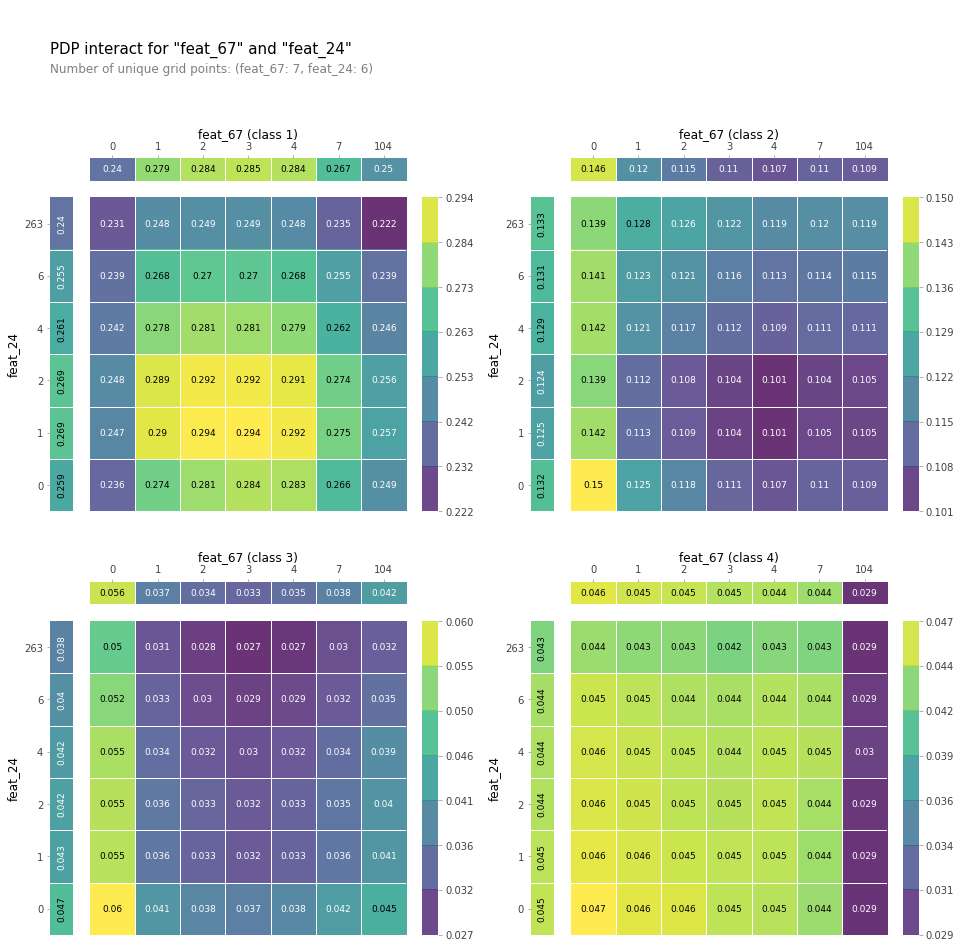

In [25]:
fig, axes = pdp.pdp_interact_plot(
    pdp_67_24_rf, ['feat_67', 'feat_24'], plot_type='grid',x_quantile=True, ncols=2, plot_pdp=True, 
    which_classes=[1, 2, 3, 4]
)

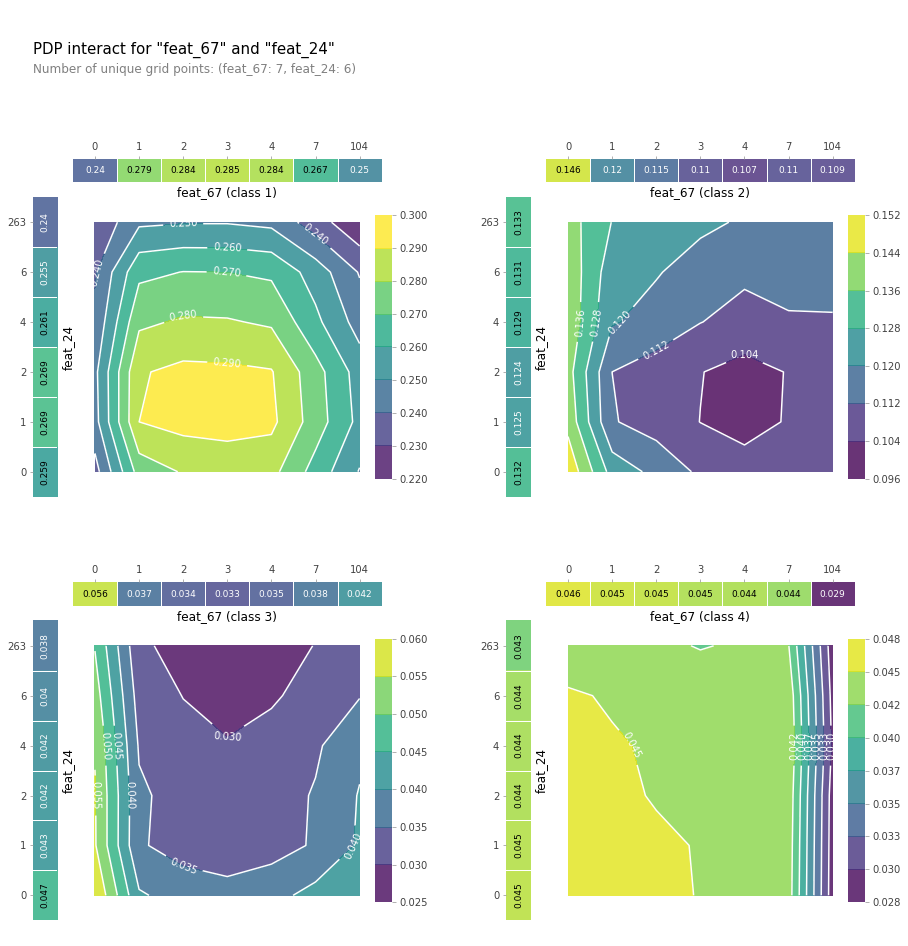

In [26]:
fig, axes = pdp.pdp_interact_plot(
    pdp_67_24_rf, ['feat_67', 'feat_24'], plot_type='contour', x_quantile=True, ncols=2, 
    plot_pdp=True, which_classes=[1, 2, 3, 4]
)